## Homework 3: Imbalanced Datasets

### Submission Instructions:

1. Submit a PDF File on GradeScope:

- Please prepare your solutions neatly and compile them into a single PDF file.
- Submit this PDF file on GradeScope before the specified deadline.
- Ensure that your submission is clearly labeled with your UNI ID
- Ensure that your solutions are entirely original and free from any form of plagiarism.


2. Submit a .ipynb File + PDF File on Courseworks:

- Alongside the PDF submission on GradeScope, also submit your Notebook (.ipynb) file and its corresponding PDF version on the Courseworks platform.
- The Notebook should contain your code, explanations, and any additional details necessary for understanding your solutions.

Please try to name your soltution file in the following format - AML_HW3_Solutions_UNI

Dataset Location -  The dataset you will be using for this assignment is called 'onlinefraud.csv'. You can find it in coursworks 'Files' section under the 'datasets' folder.

### GIST:
The goal of this assignment is to build a model that can reliably classify online payments into two categories - fraudulent and non-fradulent. You will notice that, without much effort, you can build a model that gives you a very high ‘accuracy’ score for the given dataset. However, this metric is misleading since the model cannot correctly classify instances of the minority class (‘1’ in this case). This can be attributed to the  inherent imbalance present in the target class of the dataset.  

To solve this issue, you will need to employ certain ML techniques that are designed to counter class imbalance. Hence, the focus of this assignment will be towards addressing class imbalance and testing the model using different evaluation metrics other than just accuracy.

## Name:  Apurva Patel

## UNI: amp2365

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import below any other package you need for your solution

In [4]:
!pip install imbalanced-learn

In [5]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
# from category_encoders import OrdinalEncoder

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### **Data Exploration & Cleaning**

- The dataset has been downloaded from Kaggle. You are encouraged to check this [link](https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection) to learn more about the dataset you are going to work with.<br> <br>

- _OPTIONAL_ : By now, you should be comfortable with data cleaning. Employ all necessary techniques you feel would help improve your dataset. This includes handling missing values, outliers, datatype discrepancies, etc. Other 'preprocessing' techniques have been included later in the assignment. This part is just about cleaning your dataset (data-munging) and will not be graded.

In [7]:
#import the dataset

In [8]:
frauddf=pd.read_csv('/content/drive/MyDrive/AML_3/onlinefraud.csv')

In [9]:
frauddf

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [10]:
frauddf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
missing_values = frauddf.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


- There are no missing values in the dataset.

### **1. Examining Class Imbalance.**

a. Identify the correct target column. A single line comment for the answer is sufficient.</br>
b. Examine the class imbalance in the target column. What is its class distribution? Show this information visually using an appropriate scale. </br>
c. What is the degree of imbalance? (Mild/Moderate/Extreme)

In [12]:
frauddf.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [13]:
colnames = frauddf.columns
colnames

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [14]:
frauddf['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

**(a) I feel the correct target column is the column with name `isFraud`.**


In [15]:
print(f'Percentage of minority class: {(8213 / (8213 + 6354407)) * 100:.5f}%')

Percentage of minority class: 0.12908%


**(b) Class Imbalance visualization using a logscale on y-axis**

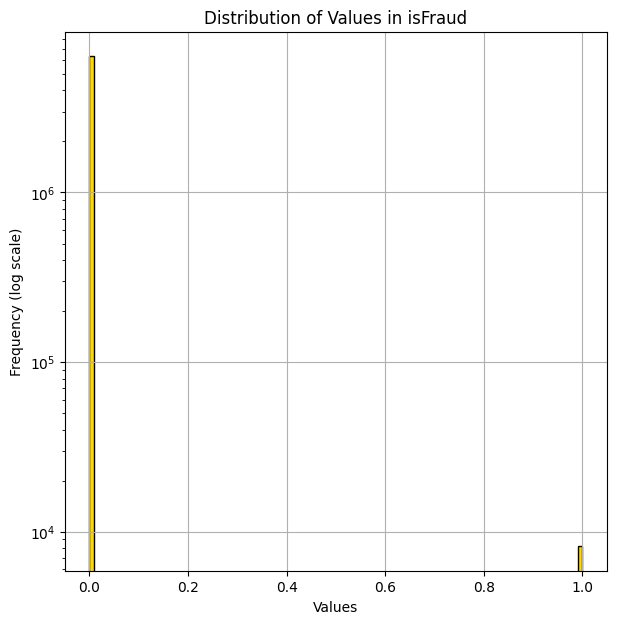

In [16]:
#Your code here
coi = 'isFraud'

plt.figure(figsize=(7, 7))
plt.hist(frauddf[coi], bins=100, color='gold', edgecolor='black')

plt.yscale('log')

plt.xlabel('Values')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Values in ' + coi)

plt.grid(True)


plt.show()

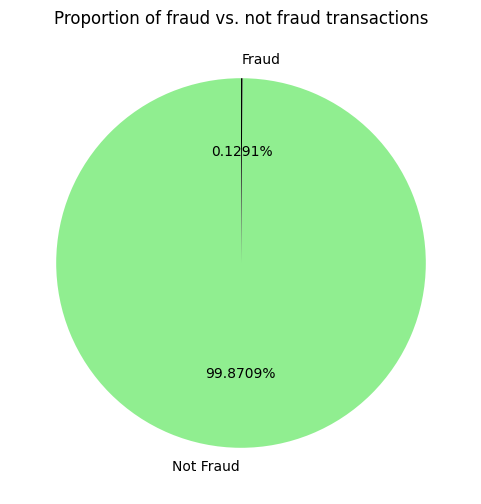

In [17]:
fraudval = frauddf['isFraud'].value_counts()
labels = ['Not Fraud', 'Fraud']

plt.figure(figsize=(6, 6))
plt.pie(fraudval, labels=labels, autopct='%1.4f%%', colors=['lightgreen', 'black'], startangle=90)
plt.title('Proportion of fraud vs. not fraud transactions')
plt.show()

**(b) Class imabalnce distribution in target column  `isFraud`.**

In [18]:
#Your code here
noFraud, Fraud = np.bincount(frauddf['isFraud'])
total = noFraud + Fraud
print('Total: {}\nFraud detected: {} ({:.4f}% of total)\n'.format(
    total, Fraud, 100 * Fraud / total))

Total: 6362620
Fraud detected: 8213 (0.1291% of total)



**(c) This is an extreme case of class imbalance with *0.1291%* being in minority class**

In [19]:
#Your code here

### **2. Pre-processing**

a. Encode categorical columns, and scale numerical columns. Drop irrelevant features (if any). </br>
b. How did you make this decision about whom to drop? Since there are only 10 features (other than the target column), should we consider including them all? </br>
c. Split the dataset into development and test sets. What splitting methodology did you choose, and why? </br>
d. Print the shape of the development and test set.

In [20]:
#Your code here
for column_name in colnames:
    counts = frauddf[column_name].nunique()
    print(f"Unique values and their frequencies for column '{column_name}':")
    print(counts)
    print()

Unique values and their frequencies for column 'step':
743

Unique values and their frequencies for column 'type':
5

Unique values and their frequencies for column 'amount':
5316900

Unique values and their frequencies for column 'nameOrig':
6353307

Unique values and their frequencies for column 'oldbalanceOrg':
1845844

Unique values and their frequencies for column 'newbalanceOrig':
2682586

Unique values and their frequencies for column 'nameDest':
2722362

Unique values and their frequencies for column 'oldbalanceDest':
3614697

Unique values and their frequencies for column 'newbalanceDest':
3555499

Unique values and their frequencies for column 'isFraud':
2

Unique values and their frequencies for column 'isFlaggedFraud':
2



In [21]:
#Your code here
frauddf.corr()

<ipython-input-21-2d8d4c304d50>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  frauddf.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<ipython-input-22-fdfeec9d38c7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(frauddf.corr(), annot=True)


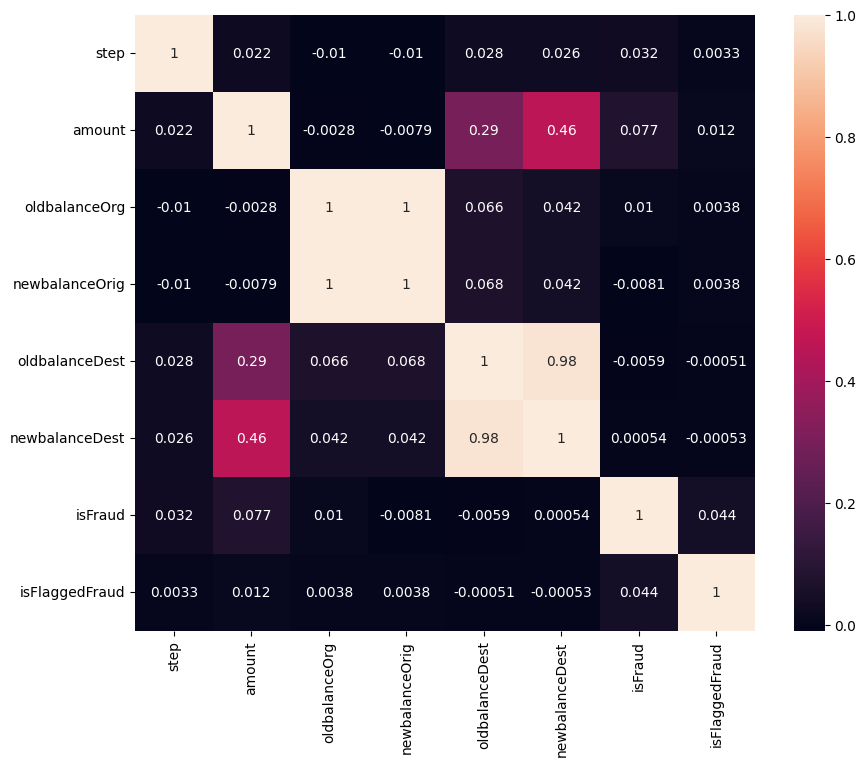

In [22]:
#Your code here
plt.figure(figsize=(10, 8))
ax = sns.heatmap(frauddf.corr(), annot=True)
plt.show()

In [23]:
#Your code here: Dropping nameOrigin and nameDestination columns as identifier columns are irrelevant

frauddf_processed = frauddf.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])

encoder = LabelEncoder()
frauddf_processed['type'] = encoder.fit_transform(frauddf_processed['type'])

scaler = StandardScaler()
numerical_columns = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
frauddf_processed[numerical_columns] = scaler.fit_transform(frauddf_processed[numerical_columns])


**(b) I dropped *`isFlaggedFraud`*, *`nameOrig`* and *`nameDest`* becasue those are indicator and identifier columns respectively and dont really matter if we include them in the model training as they serve no purpose. Also the origin and destination of the transaction doesn't determine the nature of transaction and hence can be removed.**

**Less features doesn't necesasarily mean we should include them all. We want all the features for EDA but only the relevant features for the model training and selection which will not overfit the model.**

In [24]:
# splitting dev and test

X = frauddf_processed.drop(columns=['isFraud'])
y = frauddf_processed['isFraud']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**I used stratified splitting as this is a highly imbalanced dataset and we want to maintain the ratio of samples.**

- Also inheritently this can be done using structured splitting with stratify as true to maintain the order of time asa given by *`step`* feature.



In [25]:
print("Development set shape:", X_dev.shape, y_dev.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Development set shape: (5090096, 7) (5090096,)
Test set shape: (1272524, 7) (1272524,)


### 3.1 Default Dataset
Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation </br>

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [27]:
#Your Code Here
model = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42)
model.fit(X_dev, y_dev)

print('Training performance: ', model.score(X_dev, y_dev))
print('Testing performance: ', model.score(X_test, y_test))

Training performance:  0.9996956835391709
Testing performance:  0.9996448004124088


In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score

In [29]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores_default = cross_val_score(model, X_dev, y_dev, cv=cv, scoring='roc_auc')
ap_scores_default = cross_val_score(model, X_dev, y_dev, cv=cv, scoring='average_precision')

In [30]:
print("AUC scores for each fold:", auc_scores_default)
print("AP scores for each fold:", ap_scores_default)

print("Average AUC:", np.mean(auc_scores_default))
print("Average AP:", np.mean(ap_scores_default))

AUC scores for each fold: [0.99451094 0.98727335 0.99019815 0.99585243 0.99190921]
AP scores for each fold: [0.87541948 0.83606963 0.85766722 0.87010247 0.85139786]
Average AUC: 0.991948815465746
Average AP: 0.8581313331353269


### 3.2 Balanced Weight

a. Here, we are going to use a 'balanced' decision tree clasifier on the same dataset. Use max_depth=10 and random_state=42, and then print the AUC and Average Precision values of 5 Fold Cross Validation.

In [31]:
#Your Code Here
model_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
model_balanced.fit(X_dev, y_dev)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores_balanced = cross_val_score(model_balanced, X_dev, y_dev, cv=cv, scoring='roc_auc')
ap_scores_balanced = cross_val_score(model_balanced, X_dev, y_dev, cv=cv, scoring='average_precision')

In [33]:
print("AUC scores for each fold with balanced class weights:", auc_scores_balanced)
print("AP scores for each fold with balanced class weights:", ap_scores_balanced)

print("Average AUC with balanced class weights:", np.mean(auc_scores_balanced))
print("Average AP with balanced class weights:", np.mean(ap_scores_balanced))

AUC scores for each fold with balanced class weights: [0.99117479 0.98337159 0.99091018 0.99541539 0.98599213]
AP scores for each fold with balanced class weights: [0.8123268  0.7926297  0.76804995 0.79762453 0.80370554]
Average AUC with balanced class weights: 0.9893728148144187
Average AP with balanced class weights: 0.794867303636605


### 3.3 Random Oversampling**

a. Perform random oversampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repear part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [34]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [35]:
#Your Code Here
ros = RandomOverSampler(random_state=42)
X_dev_os, y_dev_os = ros.fit_resample(X_dev, y_dev)

print('Dev set shape before Oversapmpling', X_dev.shape, y_dev.shape)
print('Dev set shape after Oversapmpling', X_dev_os.shape, y_dev_os.shape)

Dev set shape before Oversapmpling (5090096, 7) (5090096,)
Dev set shape after Oversapmpling (10167052, 7) (10167052,)


In [36]:
print('No of samples before OS in target: \n \n', y_dev.value_counts())
print('\n\n No of samples after OS in target: \n \n', y_dev_os.value_counts())

No of samples before OS in target: 
 
 0    5083526
1       6570
Name: isFraud, dtype: int64


 No of samples after OS in target: 
 
 0    5083526
1    5083526
Name: isFraud, dtype: int64


In [37]:
model_os = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42)
model_os.fit(X_dev_os, y_dev_os)

print('Training performance: ', model_os.score(X_dev_os, y_dev_os))
print('Testing performance: ', model_os.score(X_test, y_test))

Training performance:  0.9965978338657066
Testing performance:  0.9933164325387969


In [38]:
#Your Code Here
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores_os = cross_val_score(model_os, X_dev_os, y_dev_os, cv=cv, scoring='roc_auc')
ap_scores_os = cross_val_score(model_os, X_dev_os, y_dev_os, cv=cv, scoring='average_precision')

In [39]:
print("AUC scores for each fold after OS:", auc_scores_os)
print("AP scores for each fold after OS:", ap_scores_os)

print("Average AUC after OS:", np.mean(auc_scores_os))
print("Average AP after OS:", np.mean(ap_scores_os))

AUC scores for each fold after OS: [0.99964644 0.99963077 0.99963044 0.99963454 0.99962974]
AP scores for each fold after OS: [0.99958381 0.99956136 0.99956076 0.99956333 0.99956096]
Average AUC after OS: 0.9996343850690332
Average AP after OS: 0.9995660442524503


### 3.4 Random Undersampling

a. Perform random undersampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repear part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [40]:
#Your Code Here
rus = RandomUnderSampler(random_state=42)
X_dev_us, y_dev_us = rus.fit_resample(X_dev, y_dev)

print('Dev set shape before Undersampling', X_dev.shape, y_dev.shape)
print('Dev set shape after Undersampling', X_dev_us.shape, y_dev_us.shape)

Dev set shape before Undersampling (5090096, 7) (5090096,)
Dev set shape after Undersampling (13140, 7) (13140,)


In [41]:
print('No of samples before US in target: \n \n', y_dev.value_counts())
print('\n\n No of samples after US in target: \n \n', y_dev_us.value_counts())

No of samples before US in target: 
 
 0    5083526
1       6570
Name: isFraud, dtype: int64


 No of samples after US in target: 
 
 0    6570
1    6570
Name: isFraud, dtype: int64


In [42]:
#Your Code Here
model_us = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42)
model_us.fit(X_dev_us, y_dev_us)

print('Training performance: ', model_us.score(X_dev_us, y_dev_us))
print('Testing performance: ', model_us.score(X_test, y_test))

Training performance:  0.9975646879756469
Testing performance:  0.989853236559782


In [43]:
#Your Code Here
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores_us = cross_val_score(model_us, X_dev_us, y_dev_us, cv=cv, scoring='roc_auc')
ap_scores_us = cross_val_score(model_us, X_dev_us, y_dev_us, cv=cv, scoring='average_precision')

In [44]:
print("AUC scores for each fold after US:", auc_scores_us)
print("AP scores for each fold after US:", ap_scores_us)

print("Average AUC after US:", np.mean(auc_scores_us))
print("Average AP after US:", np.mean(ap_scores_us))

AUC scores for each fold after US: [0.99352251 0.98769747 0.99603816 0.99376953 0.99297404]
AP scores for each fold after US: [0.98949547 0.98188489 0.9930825  0.99038334 0.9879989 ]
Average AUC after US: 0.9928003424078359
Average AP after US: 0.988569021346079


### 3.5 SMOTE

a. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset. (Please set random state to 42 while doing this). Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repear part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [45]:
#Your Code Here
smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

print('Dev set shape before SMOTE', X_dev.shape, y_dev.shape)
print('Dev set shape after SMOTE', X_dev_smote.shape, y_dev_smote.shape)

Dev set shape before SMOTE (5090096, 7) (5090096,)
Dev set shape after SMOTE (10167052, 7) (10167052,)


In [46]:
print('No of samples before US in target: \n \n', y_dev.value_counts())
print('\n\n No of samples after US in target: \n \n', y_dev_smote.value_counts())

No of samples before US in target: 
 
 0    5083526
1       6570
Name: isFraud, dtype: int64


 No of samples after US in target: 
 
 0    5083526
1    5083526
Name: isFraud, dtype: int64


In [47]:
#Your Code Here
model_smote = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42)
model_smote.fit(X_dev_smote, y_dev_smote)

print('Training performance: ', model_smote.score(X_dev_smote, y_dev_smote))
print('Testing performance: ', model_smote.score(X_test, y_test))

Training performance:  0.9947540348962511
Testing performance:  0.9930280293338278


In [48]:
#Your Code Here
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores_smote = cross_val_score(model_smote, X_dev_smote, y_dev_smote, cv=cv, scoring='roc_auc')
ap_scores_smote = cross_val_score(model_smote, X_dev_smote, y_dev_smote, cv=cv, scoring='average_precision')

In [49]:
print("AUC scores for each fold after SMOTE:", auc_scores_smote)
print("AP scores for each fold after SMOTE:", ap_scores_smote)

print("Average AUC after SMOTE:", np.mean(auc_scores_smote))
print("Average AP after SMOTE:", np.mean(ap_scores_smote))

AUC scores for each fold after SMOTE: [0.99958403 0.99957896 0.99957771 0.99957808 0.99957023]
AP scores for each fold after SMOTE: [0.99951825 0.99951117 0.99951148 0.99950789 0.99950576]
Average AUC after SMOTE: 0.9995778037298211
Average AP after SMOTE: 0.9995109124081033


### 3.6 Visual Comparison

Prepare a plot comparing the class distribtion of the target column for each of the imbalance techiques used above. Use the default class split as well.

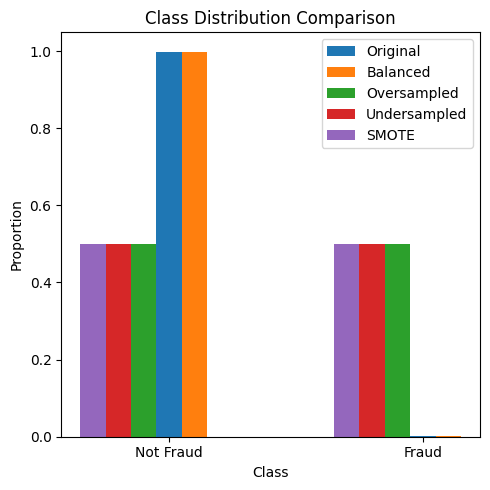

In [50]:
#Your Code Here

class_distribution_original = y.value_counts(normalize=True)
class_distribution_balanced = y_dev.value_counts(normalize=True)
class_distribution_os = y_dev_os.value_counts(normalize=True)
class_distribution_us = y_dev_us.value_counts(normalize=True)
class_distribution_smote = y_dev_smote.value_counts(normalize=True)

bar_width = 0.1
index = np.arange(2)

plt.figure(figsize=(5, 5))
plt.bar(index, class_distribution_original.values, bar_width, alpha=1, label='Original')
plt.bar(index + bar_width, class_distribution_balanced.values, bar_width, alpha=1, label='Balanced')
plt.bar(index - bar_width, class_distribution_os.values, bar_width, alpha=1, label='Oversampled')
plt.bar(index - 2*bar_width, class_distribution_us.values, bar_width, alpha=1, label='Undersampled')
plt.bar(index - 3*bar_width, class_distribution_smote.values, bar_width, alpha=1, label='SMOTE')

plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution Comparison')
plt.xticks(index, ['Not Fraud', 'Fraud'])
plt.legend()

plt.tight_layout()
plt.show()

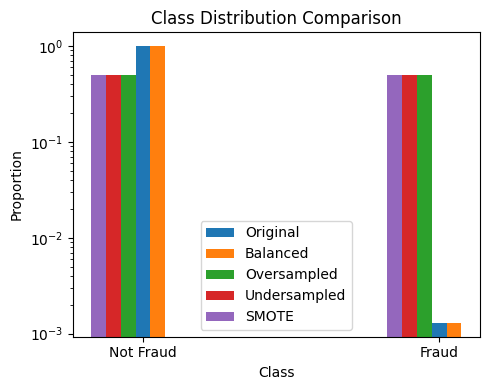

In [51]:
#Your Code Here

class_distribution_original = y.value_counts(normalize=True)
class_distribution_balanced = y_dev.value_counts(normalize=True)
class_distribution_os = y_dev_os.value_counts(normalize=True)
class_distribution_us = y_dev_us.value_counts(normalize=True)
class_distribution_smote = y_dev_smote.value_counts(normalize=True)

bar_width = 0.05
index = np.arange(2)

plt.figure(figsize=(5, 4))
plt.bar(index, class_distribution_original.values, bar_width, alpha=1, label='Original')
plt.bar(index + bar_width, class_distribution_balanced.values, bar_width, alpha=1, label='Balanced')
plt.bar(index - bar_width, class_distribution_os.values, bar_width, alpha=1, label='Oversampled')
plt.bar(index - 2*bar_width, class_distribution_us.values, bar_width, alpha=1, label='Undersampled')
plt.bar(index - 3*bar_width, class_distribution_smote.values, bar_width, alpha=1, label='SMOTE')

plt.yscale('log')

plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution Comparison')
plt.xticks(index, ['Not Fraud', 'Fraud'])
plt.legend()
plt.tight_layout()
plt.show()

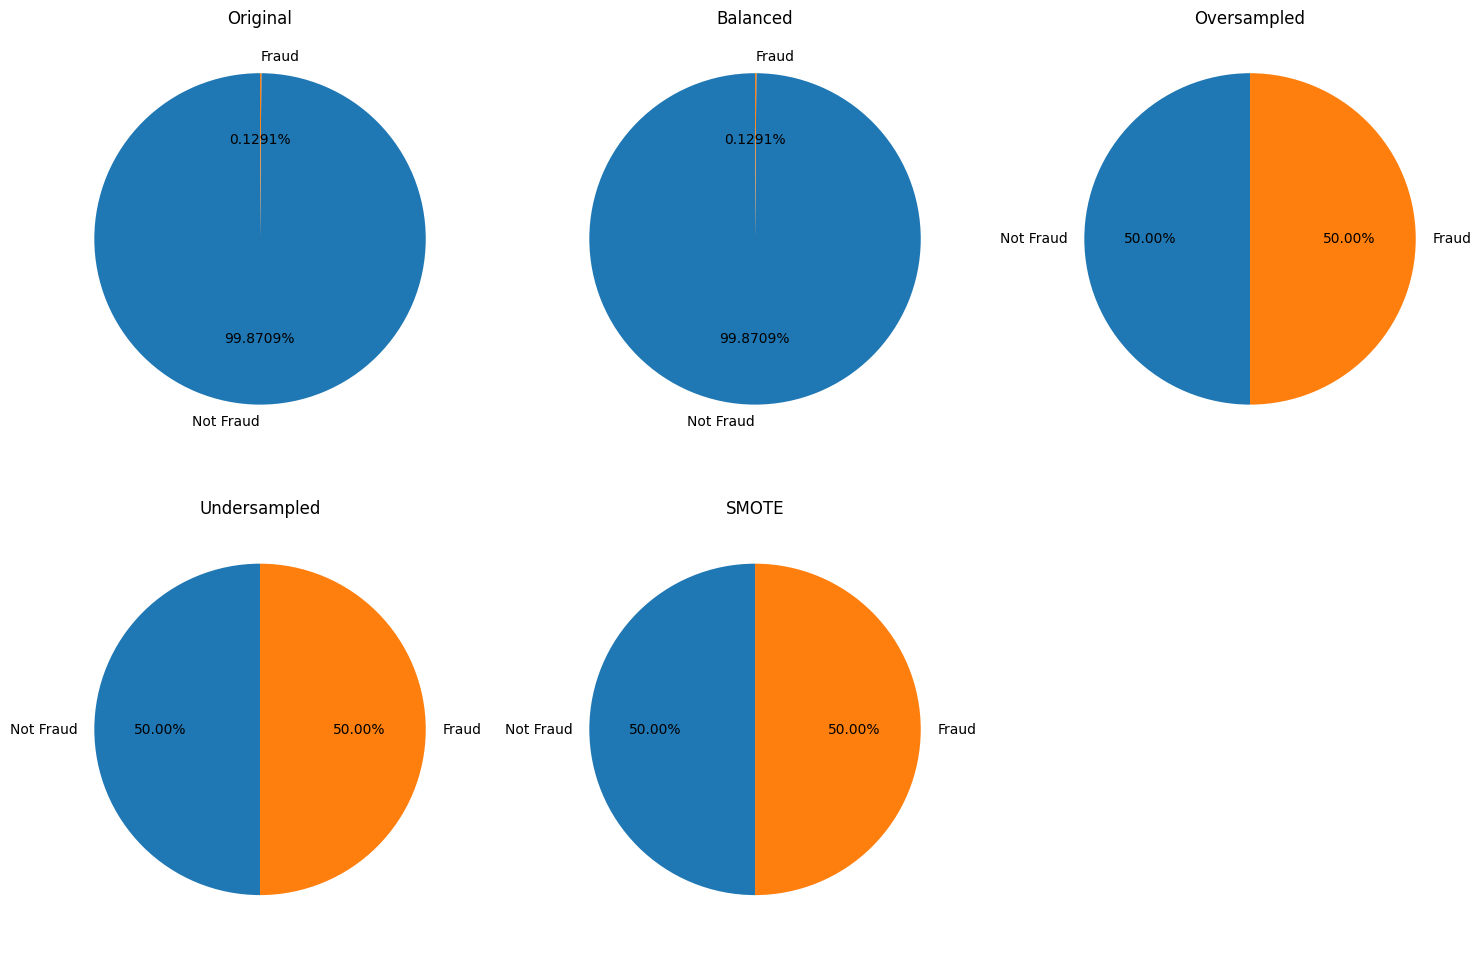

In [52]:
labels = ['Not Fraud', 'Fraud']
original_sizes = class_distribution_original.values
balanced_sizes = class_distribution_balanced.values
os_sizes = class_distribution_os.values
us_sizes = class_distribution_us.values
smote_sizes = class_distribution_smote.values

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0].pie(original_sizes, labels=labels, autopct='%1.4f%%', startangle=90)
axs[0, 0].set_title('Original')

axs[0, 1].pie(balanced_sizes, labels=labels, autopct='%1.4f%%', startangle=90)
axs[0, 1].set_title('Balanced')

# OS
axs[0, 2].pie(os_sizes, labels=labels, autopct='%1.2f%%', startangle=90)
axs[0, 2].set_title('Oversampled')

# US
axs[1, 0].pie(us_sizes, labels=labels, autopct='%1.2f%%', startangle=90)
axs[1, 0].set_title('Undersampled')

# SMOTE
axs[1, 1].pie(smote_sizes, labels=labels, autopct='%1.2f%%', startangle=90)
axs[1, 1].set_title('SMOTE')

# hideing empty subplot
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


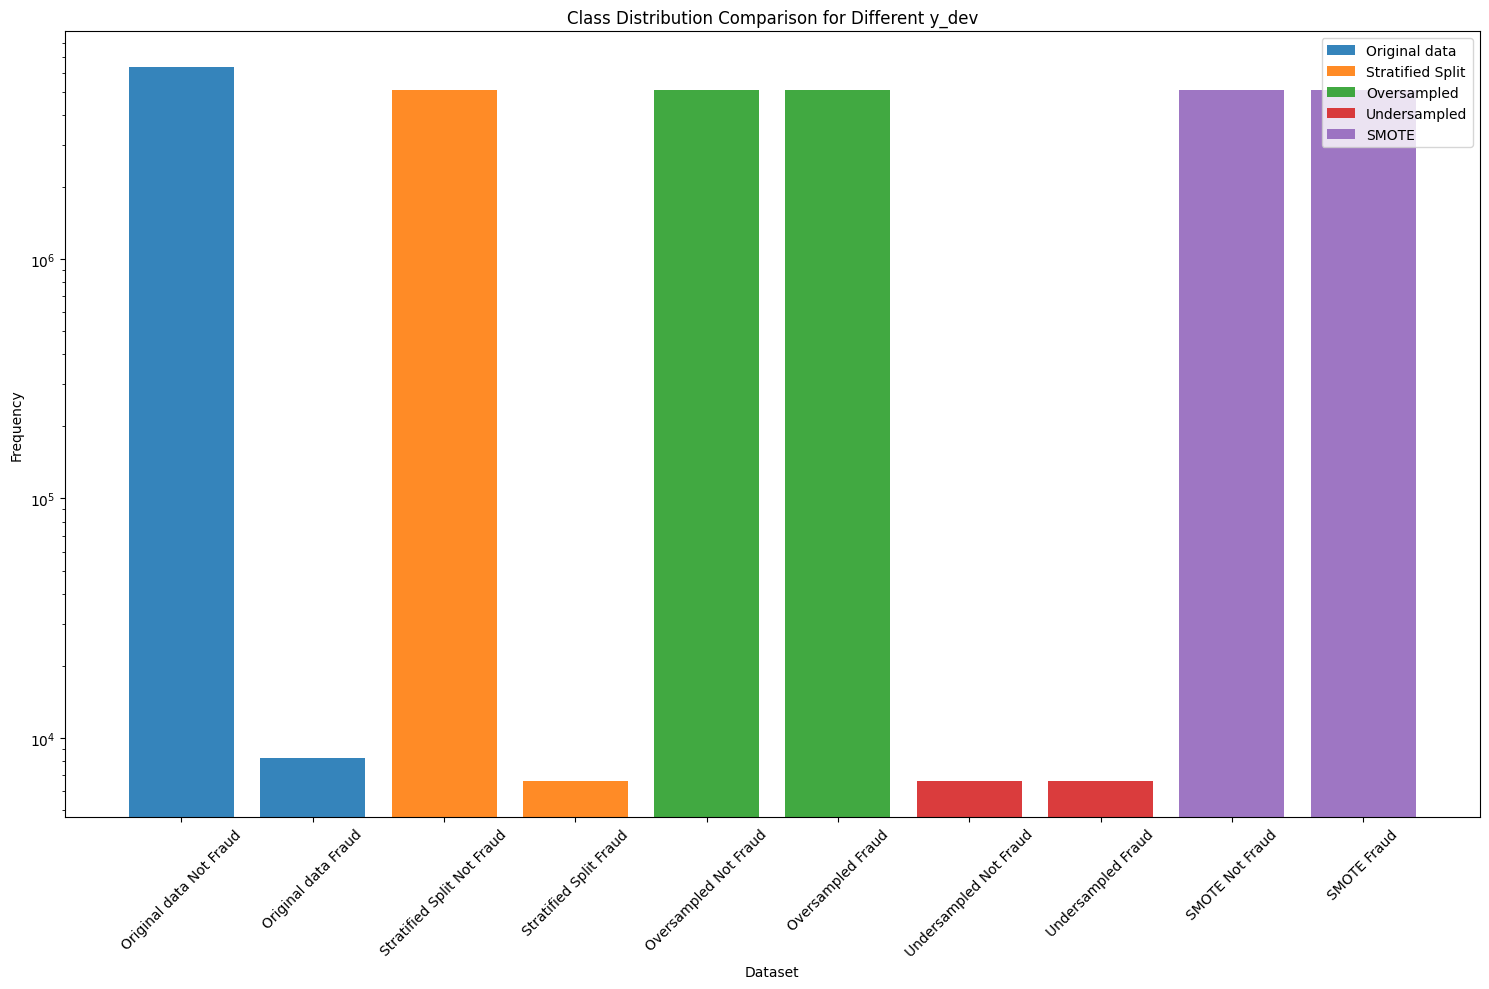

In [53]:

# List of y_dev variables and their corresponding labels
y_dev_list = [y, y_dev, y_dev_os, y_dev_us, y_dev_smote]
labels = ['Original data', 'Stratified Split', 'Oversampled', 'Undersampled', 'SMOTE']

# Unpack value counts for each y_dev variable, taking only the first two values
class_counts = [(nf, f) for y_dev in y_dev_list for nf, f in [y_dev.value_counts()[:2]]]

# Plot
plt.figure(figsize=(15, 10))

bars = []
legend_handles = []

for i, (nf, f) in enumerate(class_counts):
    bars.extend(plt.bar([f'{labels[i]} Not Fraud', f'{labels[i]} Fraud'], [nf, f], alpha=0.9))
    legend_handles.append(bars[i])

plt.yscale('log')
plt.xticks(rotation=45)
plt.xlabel('Dataset')
plt.ylabel('Frequency')
plt.title('Class Distribution Comparison for Different y_dev')
plt.legend(labels)
plt.tight_layout()
plt.show()


### **4: Model Prediction & Evaluation - AUC Scores**
4.1 Make predictions on the test set using the five models that you built and report their AUC values<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight). Did the models with high AUC scores on the development set exhibit similar performance on the test set? Explain.

In [54]:
from sklearn.metrics import roc_auc_score

**AUC scores on DEV set**

In [55]:
print("Average AUC :", np.mean(auc_scores_default))
print("Average AUC (balanced weights):", np.mean(auc_scores_balanced))
print("Average AUC after OS:", np.mean(auc_scores_os))
print("Average AUC after US:", np.mean(auc_scores_us))
print("Average AUC after SMOTE:", np.mean(auc_scores_smote))

Average AUC : 0.991948815465746
Average AUC (balanced weights): 0.9893728148144187
Average AUC after OS: 0.9996343850690332
Average AUC after US: 0.9928003424078359
Average AUC after SMOTE: 0.9995778037298211


**Making predictions on Test set**

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
#Your Code Here

models = [model, model_balanced, model_os, model_us, model_smote]
model_names = ['Default Baseline', 'Balanced Weight', 'Random Oversampling', 'Random Undersampling', 'SMOTE']

auc_scores_test = {}

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    auc_scores_test[name] = auc

for name, auc in auc_scores_test.items():
    print(f"AUC for {name}: {auc:.4f}")


AUC for Default Baseline: 0.8919
AUC for Balanced Weight: 0.9884
AUC for Random Oversampling: 0.9906
AUC for Random Undersampling: 0.9919
AUC for SMOTE: 0.9941


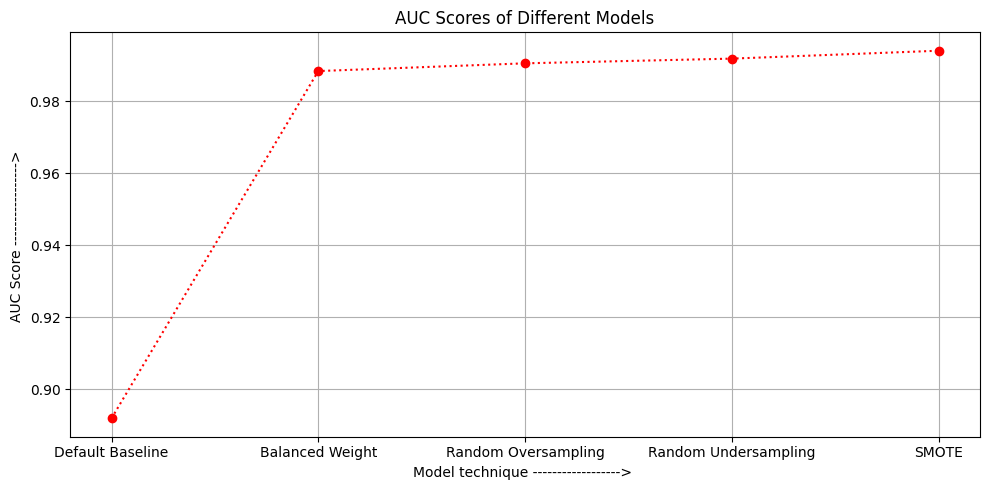

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(model_names, auc_scores_test.values(), marker='o', linestyle='dotted', color='r')
plt.xlabel('Model technique ------------------> ')

# plt.xticks(rotation=45)
plt.ylabel('AUC Score -----------------> ')
plt.title('AUC Scores of Different Models')
plt.grid(True)
plt.tight_layout()
plt.show()


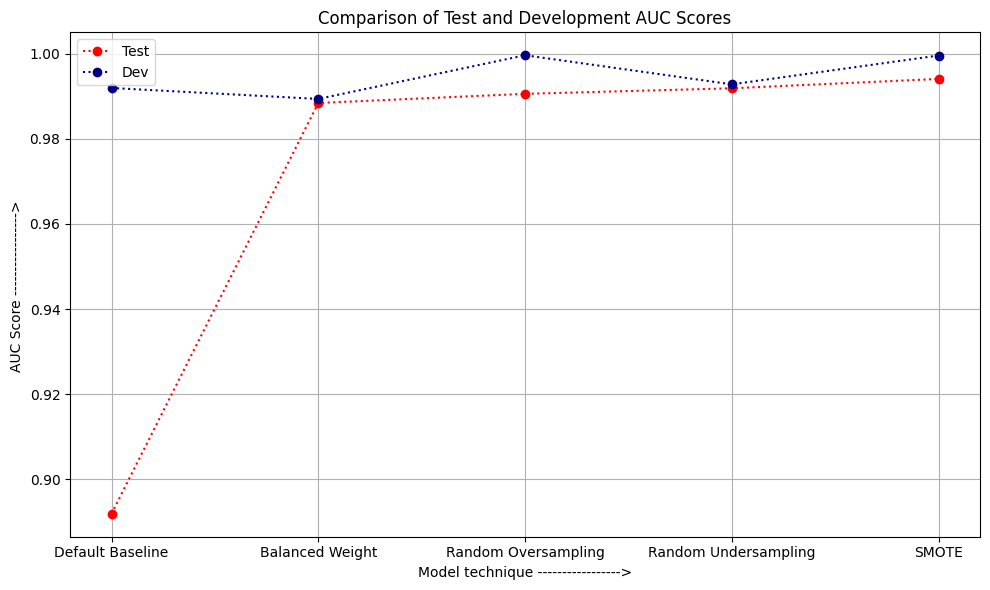

In [59]:
dev_auc_scores = [np.mean(auc_scores_default), np.mean(auc_scores_balanced),
                  np.mean(auc_scores_os), np.mean(auc_scores_us), np.mean(auc_scores_smote)]

test_auc_scores = [auc_scores_test['Default Baseline'], auc_scores_test['Balanced Weight'],
                   auc_scores_test['Random Oversampling'], auc_scores_test['Random Undersampling'], auc_scores_test['SMOTE']]

model_names = ['Default Baseline', 'Balanced Weight', 'Random Oversampling', 'Random Undersampling', 'SMOTE']

plt.figure(figsize=(10, 6))

plt.plot(model_names, test_auc_scores, marker='o', label='Test', linestyle='dotted', color='red')
plt.plot(model_names, dev_auc_scores, marker='o', label='Dev',linestyle='dotted',  color='navy')

plt.xlabel('Model technique ----------------->')
plt.ylabel('AUC Score -----------------> ')
plt.title('Comparison of Test and Development AUC Scores')

# plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

- **Yes the models with high AUC values performed higher on Test set except the default model where we used the minority class as it is.**
- **In my opinion this led to overfitting and the model couldn't generalize well on the test set when presented.**

### **4: Model Prediction & Evaluation - Confusion Matrix**
4.2a.Plot Confusion Matrices for all the five models on the test set. Comment on your results and share in detail. Consider precision, recall and f1 scores. <br>
4.2b. For the dataset at hand, which evaluation metric matters most according to you?

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

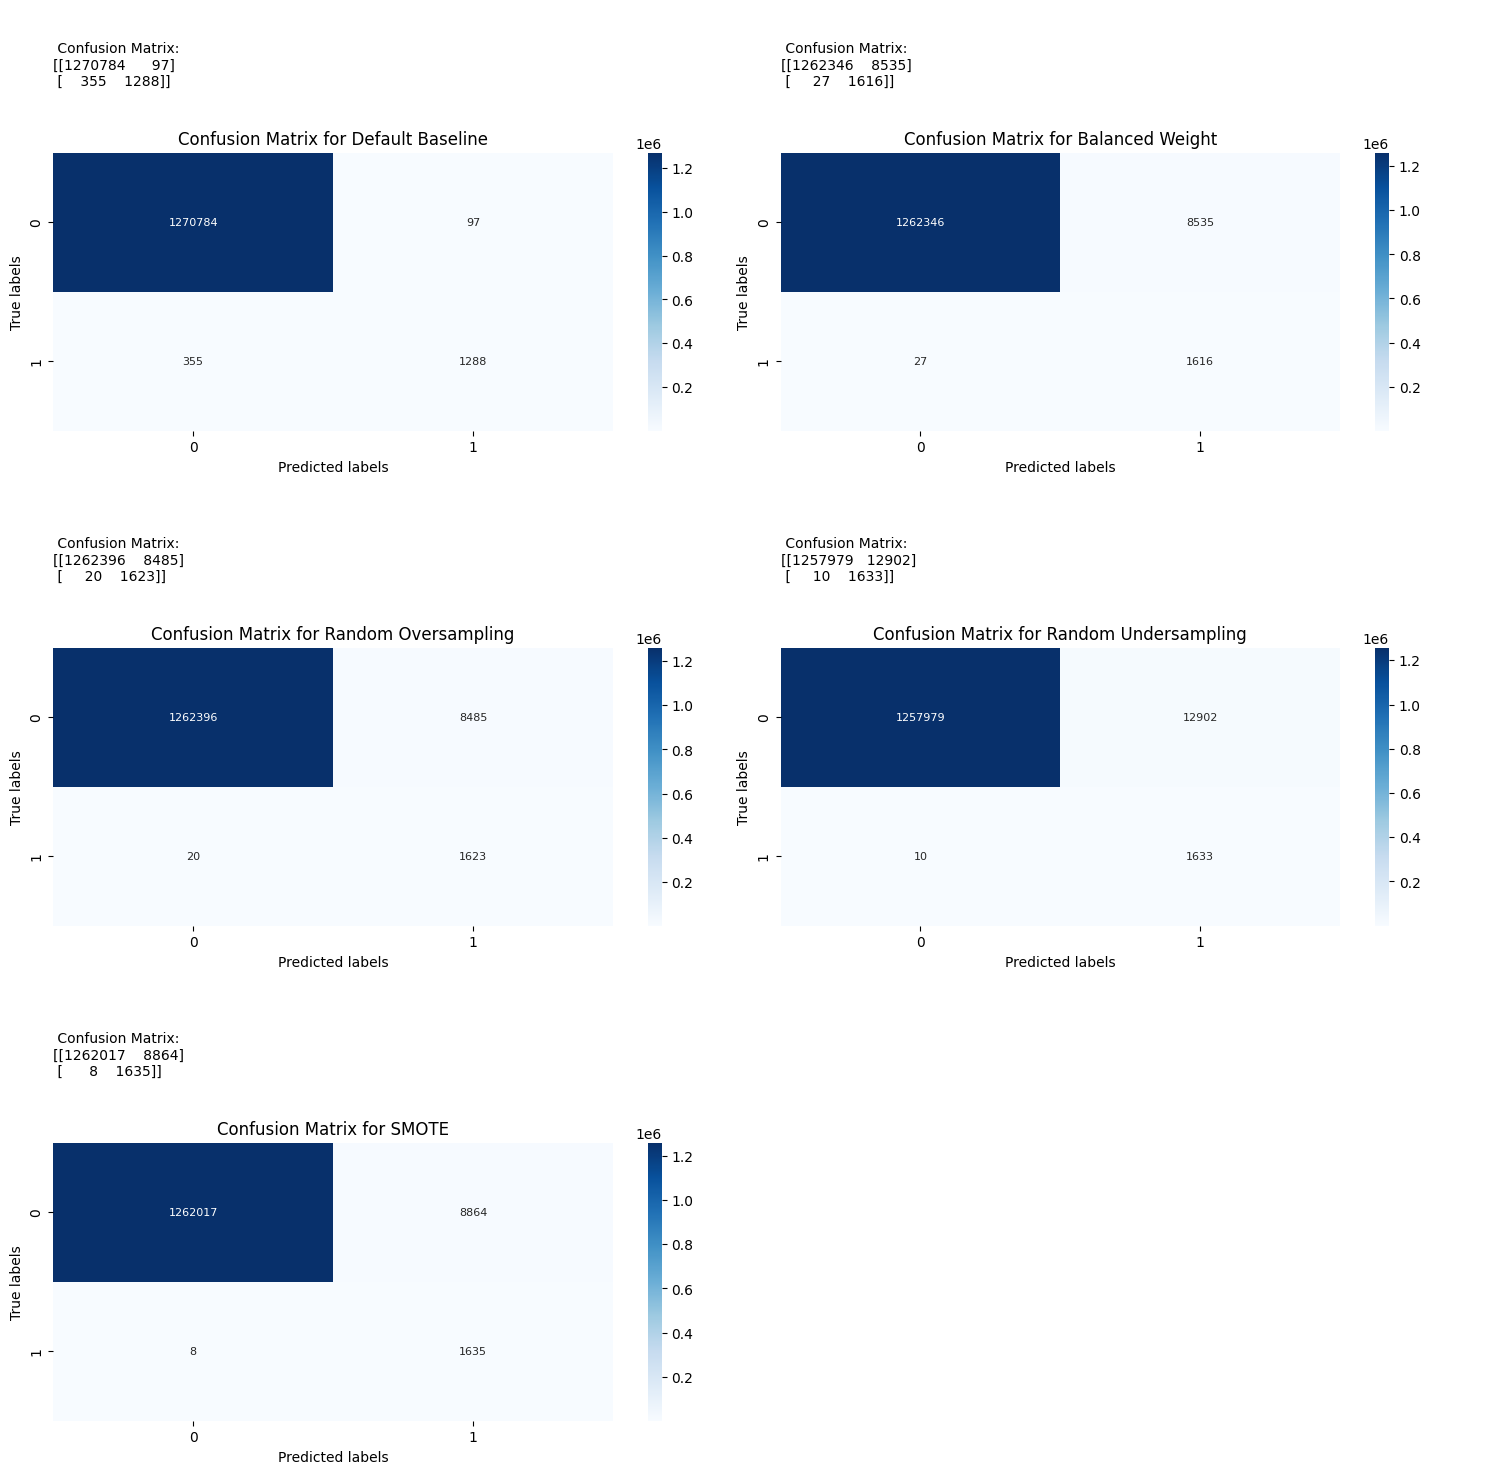

In [61]:
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8}, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.text(0, -0.5, f'\n\n Confusion Matrix: \n{cm}', fontsize=10, ha='left', wrap=True)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for model, model_name, ax in zip(models, model_names, axes.flatten()):
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name, ax)

for ax in axes[len(model_names):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


**4.2 (b)**
- For the given dataset we have to choose precision as the coerrect measure of performance as we want the values of FP as high as possible and FN as low as possible.
- We cannot afoord scenarios where its actually a fraud and it isnt classified as a fraud (FN).
- Here the precision for SMOTE is the highest and Recall is highest for Undersampling. F1 score is the highest fro SMOTE. This happens because the number of FN is the lowest in Undersamplling case.

### **4: Model Prediction & Evaluation - ROC Curves**

4.3 Plot ROC for all the five models on the test set in a single plot. Recomment which technique is most appropriate and why.

In [62]:
from sklearn.metrics import roc_curve

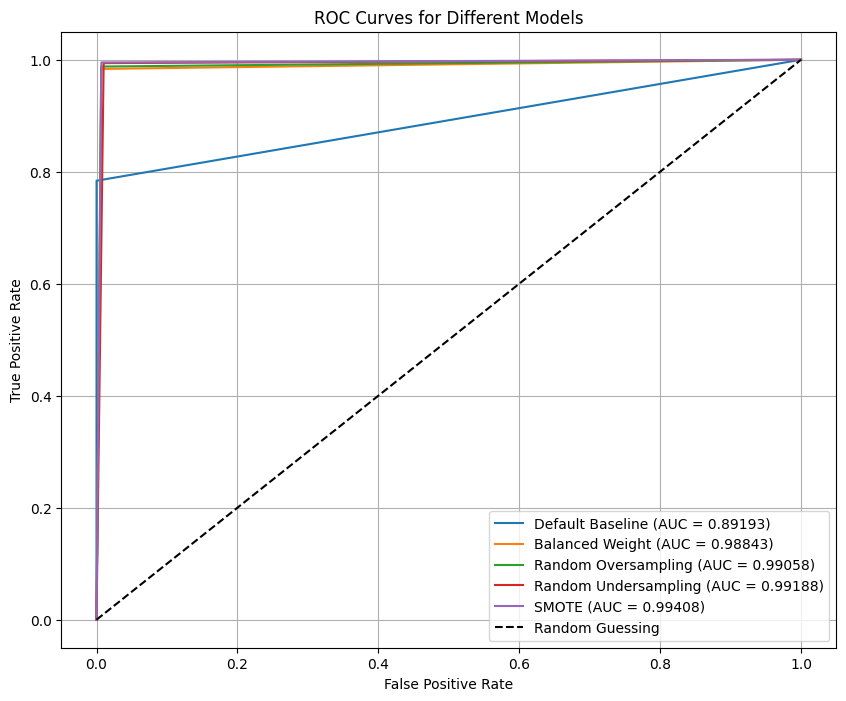

In [63]:
plt.figure(figsize=(10, 8))

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.5f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()


- **After Plotting the ROC curves, it appears almost same and close to each other.**
- **To compare effectively I plotted it on a log scale to see the minor variations near the escalation point so as to understand which is better**

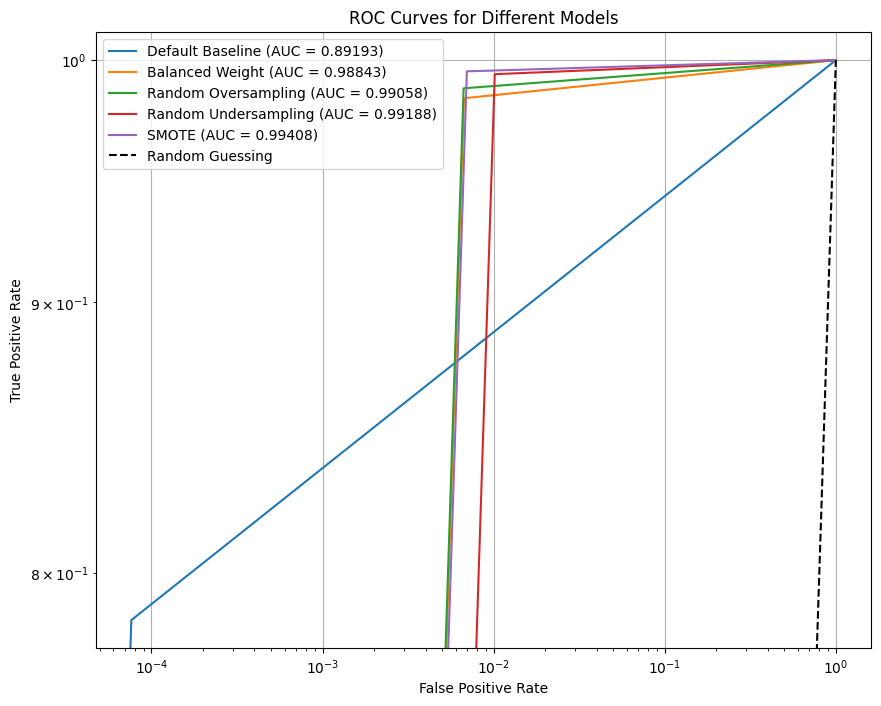

In [64]:

plt.figure(figsize=(10, 8))

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.5f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()


- **After comparong the ROC using the log scale, we clearly the technique where we used SMOTE has the maximum area under the curve (i.e. AUC value highest), so SMOTE is the most effective amongst all choices of method.**

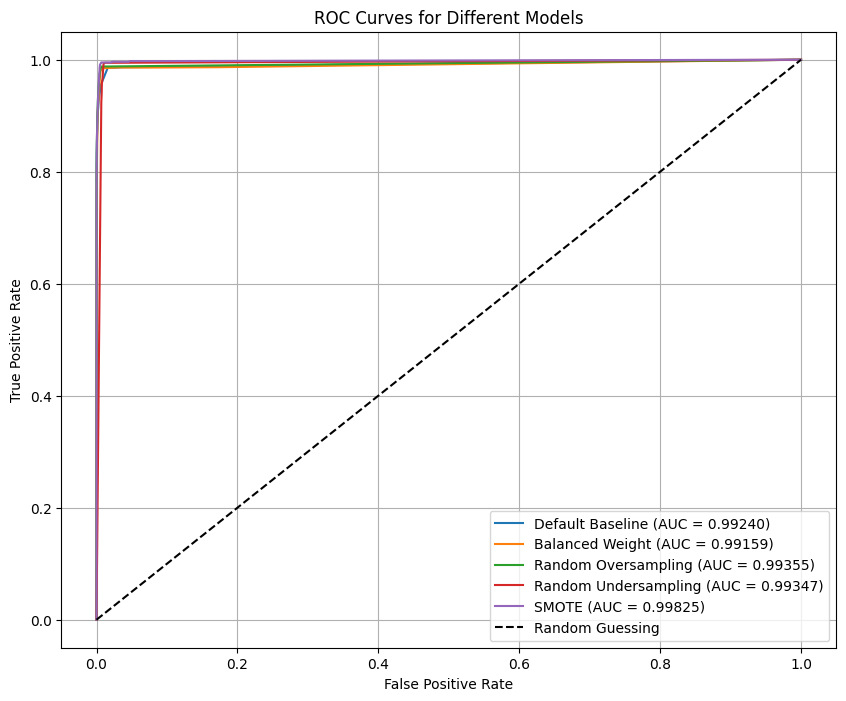

In [65]:
#Your Code Here: Using predict_proba function

plt.figure(figsize=(10, 8))

for model, model_name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.5f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()


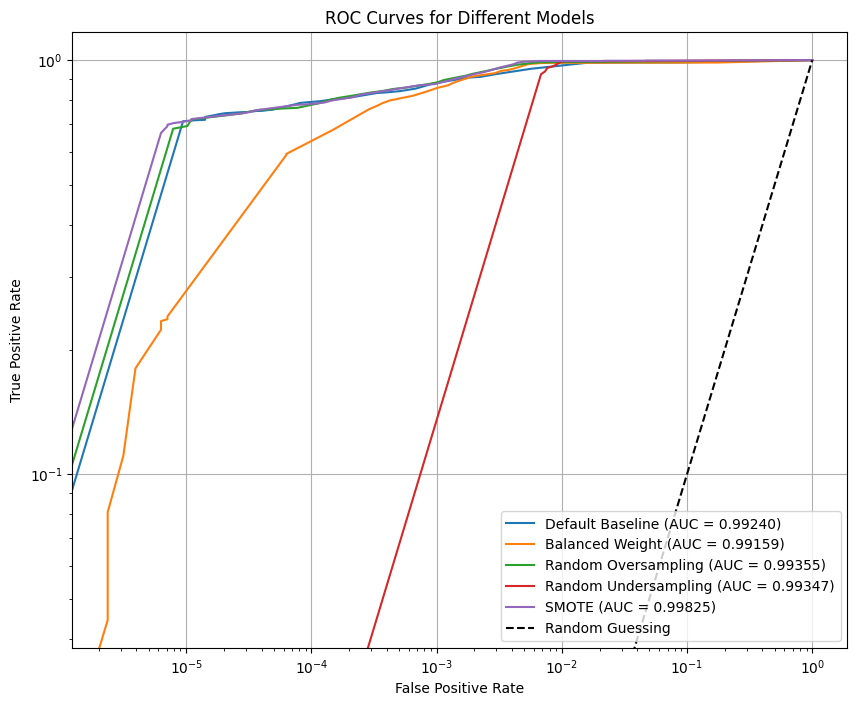

In [66]:
#Your Code Here

plt.figure(figsize=(10, 8))

for model, model_name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.5f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()



In [70]:
!jupyter nbconvert --to html /content/AML_HW3_Solutions_amp2365-3.ipynb

[NbConvertApp] Converting notebook /content/AML_HW3_Solutions_amp2365-3.ipynb to html
[NbConvertApp] Writing 1874175 bytes to /content/AML_HW3_Solutions_amp2365-3.html


In [67]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fo

In [69]:
!jupyter nbconvert AML_HW3_Solutions_amp2365-3.ipynb --to latex

[NbConvertApp] Converting notebook AML_HW3_Solutions_amp2365-3.ipynb to latex
[NbConvertApp] Support files will be in AML_HW3_Solutions_amp2365-3_files/
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp2365-3_files
[NbConvertApp] Making directory AML_HW3_Solutions_amp23